In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
average_rent_df = pd.read_csv("Resources/Average Rents_Concat.csv").dropna()
average_rent_df = average_rent_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
average_rent_df = average_rent_df[["Province", "Centre","Zone", "Neighbourhood", "Dwelling Type", "Year","Total"]]

vr_df = pd.read_csv("Resources/Vacancy Rate Concat.csv").dropna()
vr_df = vr_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
vr_df = vr_df[["Province", "Centre","Zone", "Neighbourhood", "Dwelling Type", "Year","Total"]]

rent_data_combined = pd.merge(average_rent_df, vr_df, how="left", on=["Province", "Centre","Zone", "Neighbourhood", "Dwelling Type", "Year"])
rent_data_combined = rent_data_combined.rename(columns={'Total_x': 'Average Rent','Total_y': 'Vacancy Rate'})
rent_data_combined = rent_data_combined[(rent_data_combined['Average Rent'] != 0) & (rent_data_combined['Vacancy Rate'] != 0) & (rent_data_combined['Year'] == 2022)]
rent_data_combined

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Year,Average Rent,Vacancy Rate
7161,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,2022,1009.0,3.2
7163,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,2022,901.0,2.5
7165,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Apt & Other,2022,830.0,2.9
7167,N.S.,Halifax,Peninsula South,Downtown Halifax,Apt & Other,2022,1746.0,0.8
7169,N.S.,Halifax,Peninsula South,South End,Apt & Other,2022,1381.0,0.5
...,...,...,...,...,...,...,...,...
8933,B.C.,Victoria,Esquimalt,Esquimalt,Apt & Other,2022,1327.0,1.2
8935,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,View Royal,Apt & Other,2022,1822.0,1.1
8937,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,Langford,Apt & Other,2022,1756.0,1.7
8939,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,Colwood,Apt & Other,2022,1365.0,0.8


In [4]:
average_rent_summary_province_center = rent_data_combined.groupby(["Province","Centre"]).mean(numeric_only=True)["Average Rent"].to_frame()
average_vr_summary_province_center = rent_data_combined.groupby(["Province","Centre"]).mean(numeric_only=True)["Vacancy Rate"].to_frame()

rent_vr_data_combined = pd.merge(average_rent_summary_province_center, average_vr_summary_province_center, how="left", on=["Province", "Centre"])
rent_vr_data_combined

Average Rent  Vacancy Rate
Province  Centre                                                    
Alta      Calgary                          1279.250000      1.627500
          Edmonton                         1240.666667      3.163492
          Lethbridge                       1085.153846      2.684615
B.C.      Abbotsford - Mission             1340.500000      2.816667
          Kelowna                          1600.666667      1.433333
          Vancouver                        1722.881356      0.959322
          Victoria                         1461.750000      1.765000
Man.      Winnipeg                         1208.812500      2.621875
N.B.      Moncton                          1081.555556      1.311111
          Saint John                        957.333333      1.200000
N.S.      Halifax                          1383.500000      1.075000
Nfld.Lab. St. John's                        913.333333      2.866667
Ont.      Barrie                           1543.666667      2.133333
          Belleville                       1257.250000      2.625000
          Brantford                        1243.800000      1.760000
          Greater Sudbury / Grand Sudbur   1179.500000      2.250000
          Guelph                           1477.200000      1.240000
          Hamilton                         1358.681818      1.959091
          Kingston                         1374.384615      1.269231
          Kitchener - Cambridge - Waterl   1342.857143      1.064286
          London                           1265.391304      1.743478
          Oshawa                           1408.400000      1.920000
          Ottawa                           1509.920000      1.728000
          Peterborough                     1230.750000      1.150000
          St. Catharines - Niagara         1255.300000      2.580000
          Thunder Bay                      1073.750000      1.525000
          Toronto                          1666.807339      1.421101
          Windsor                          1103.666667      1.566667
Que       Gatineau                         1272.666667      0.783333
          Montréal                         1035.877551      1.387755
          Québec                            950.000000      1.223333
          Saguenay                          679.500000      0.250000
          Sherbrooke                        816.125000      1.000000
          Trois-Rivières                    666.666667      1.083333
Sask.     Regina                           1073.800000      3.445000
          Saskatoon                        1157.800000      3.186667

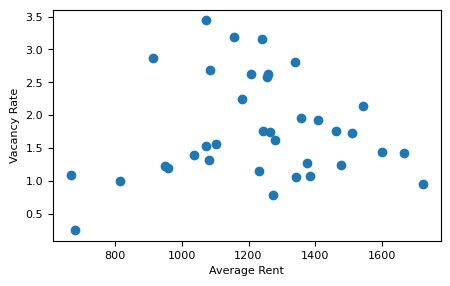

In [5]:
plt.figure(figsize=(5, 3))
plt.scatter(x=rent_vr_data_combined['Average Rent'], y=rent_vr_data_combined['Vacancy Rate'])

plt.xlabel("Average Rent", fontsize=8)
plt.ylabel("Vacancy Rate", fontsize=8)

plt.tick_params(axis='both', which='major', labelsize=8)

plt.show()